<a href="https://colab.research.google.com/github/kasprova/advanced_customer_analytics/blob/master/notebooks/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FEATURE SELECTION (update 2019-10-15)

### Mount dataset from Google Disk to Google Colab

In [1]:
#mount google drive to get access to the data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "drive/My Drive/analytics/universal_features_manual_cat.parquet.zip"

In [7]:
#!ls drive/My\ Drive/analytics/

customer_analytics.zip	DATA.zip  universal_features_manual_cat.parquet.zip


In [0]:
#libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5,10)

#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [0]:
universal_features = "universal_features_manual_cat.parquet"
data = pd.read_parquet(universal_features)


**Feature Selection Techniques:**

  1. Univariate Selection

  **2. Feature Importance**

  3. Correlation Matrix with Heatmap

Target variable - 'monetary value'

In [0]:
#data preprocessing
ignore_list = ['month_id', 'household_id']
features = [c for c in data.columns if c not in ignore_list]

df = data.copy()

# transform from negative to positive values
df[['discount_value__manufacture_coupon',
 'discount_value__misc_credit',
 'discount_value__prologic_credit',
 'discount_value__store_coupon',
 'discount_value__total',
 'refund_value',
 'return_value__bottle']] = - df[[
 'discount_value__manufacture_coupon',
 'discount_value__misc_credit',
 'discount_value__prologic_credit',
 'discount_value__store_coupon',
 'discount_value__total',
 'refund_value',
 'return_value__bottle']]

#applying log(x+1) transformation for features containing 'money' value
df[['monetary']] = np.log1p(df[['monetary']])

#applying MinMaxScaler scaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = features

In [0]:
#split on train and test dataset
X = pd.concat([scaled_df.iloc[:,0:2], scaled_df.iloc[:, 3:]], axis=1).values
y = scaled_df.iloc[:,2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
model = ExtraTreesRegressor()
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [24]:
print(model.feature_importances_)

[2.62016822e-02 1.00137323e-01 2.68177709e-02 2.81357557e-04
 2.85404319e-04 1.03787957e-03 1.07436085e-03 7.21117543e-04
 4.06899526e-04 1.19407946e-01 9.27509608e-02 1.50437122e-01
 1.85500990e-02 2.52321211e-02 1.16493681e-02 7.05944284e-05
 5.66003919e-05 2.94460832e-04 2.73854684e-04 6.12645047e-03
 6.10930568e-03 1.91849033e-02 5.72697695e-02 4.11718194e-02
 5.72778903e-02 4.64222514e-02 4.03252294e-02 4.04053932e-02
 4.20501700e-02 2.60544856e-02 1.73543481e-02 2.42045980e-02
 3.56463211e-04]


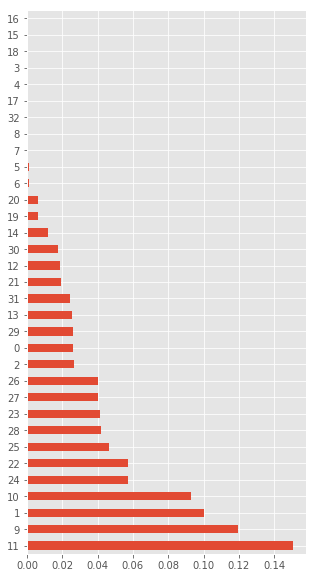

In [40]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(33).plot(kind='barh')
plt.show()

In [44]:
feat_importances.nlargest(22).index

Int64Index([11,  9,  1, 10, 24, 22, 25, 28, 23, 27, 26,  2,  0, 29, 13, 31, 21,
            12, 30, 14, 19, 20],
           dtype='int64')

In [0]:
index_list = feat_importances.nlargest(22).index
names_temp = [c for c in data.columns if c not in ['month_id', 'household_id', 'monetary']]
name_list = []
for i in index_list:
  name_list.append(names_temp[i])

In [27]:
name_list

['discount_number__total',
 'discount_number__prologic_credit',
 'frequency',
 'discount_value__prologic_credit',
 'cat_m_grains_paid_amount_pcnt',
 'cat_m_diary_paid_amount_pcnt',
 'cat_m_greens_paid_amount_pcnt',
 'cat_m_proteins_paid_amount_pcnt',
 'cat_m_drinks_paid_amount_pcnt',
 'cat_m_prepared_food_paid_amount_pcnt',
 'cat_m_misc_paid_amount_pcnt',
 'churn',
 'recency',
 'cat_m_sause_paid_amount_pcnt',
 'deposite_number__bottle',
 'duration_since_start__months',
 'cat_m_baking_paid_amount_pcnt',
 'discount_value__total',
 'cat_m_sweets_paid_amount_pcnt',
 'deposite_value__bottle',
 'cat_m_alco_tabacco_paid_amount_pcnt',
 'cat_m_baby_and_pets_paid_amount_pcnt']